In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

In [4]:
data = pd.read_csv("kc_house_data.csv")

data.shape

(21613, 21)

In [5]:
pd.options.display.max_columns = 25

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
data['year'] = pd.to_numeric(data['date'].str.slice(0, 4))
data['month'] = pd.to_numeric(data['date'].str.slice(4, 6))
data['day'] = pd.to_numeric(data['date'].str.slice(6, 8))

data.drop(['id'], axis="columns", inplace=True)
data.drop(['date'], axis="columns", inplace=True)

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [8]:
data_num = data.shape[0]

indexes = np.random.permutation(data_num)

train_indexes = indexes[:int(data_num *0.6)]
val_indexes = indexes[int(data_num *0.6):int(data_num *0.8)]
test_indexes = indexes[int(data_num *0.8):]

train_data = data.loc[train_indexes]
val_data = data.loc[val_indexes]
test_data = data.loc[test_indexes]

In [9]:
train_validation_data = pd.concat([train_data, val_data])
mean = train_validation_data.mean()
std = train_validation_data.std()

train_data = (train_data - mean) / std
val_data = (val_data - mean) / std

In [10]:
x_train = np.array(train_data.drop('price', axis='columns'))
y_train = np.array(train_data['price'])
x_val = np.array(val_data.drop('price', axis='columns'))
y_val = np.array(val_data['price'])

In [11]:
x_train.shape

(12967, 21)

In [12]:
model = keras.Sequential(name='model-1')

model.add(layers.Dense(64, activation='relu', input_shape=(21,)))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(1))

model.summary()

Model: "model-1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(keras.optimizers.Adam(0.001),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.MeanAbsoluteError()])

In [14]:
model_dir = 'lab2-logs/models/'
os.makedirs(model_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'lab2-logs/models/'

In [13]:
log_dir = os.path.join('lab2-logs', 'model-1')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)

model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-1.h5', 
                                        monitor='val_mean_absolute_error', 
                                        save_best_only=True, 
                                        mode='min')

In [14]:
history = model.fit(x_train, y_train,  
               batch_size=64,  
               epochs=300, 
               validation_data=(x_val, y_val), 
               callbacks=[model_cbk, model_mckp]) 

Epoch 1/300
203/203 [==============================] - 3s 5ms/step - loss: 0.2892 - mean_absolute_error: 0.3337 - val_loss: 0.2015 - val_mean_absolute_error: 0.2848
Epoch 2/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2022 - mean_absolute_error: 0.2795 - val_loss: 0.1805 - val_mean_absolute_error: 0.2679
Epoch 3/300
203/203 [==============================] - 1s 3ms/step - loss: 0.1799 - mean_absolute_error: 0.2630 - val_loss: 0.1757 - val_mean_absolute_error: 0.2624
Epoch 4/300
203/203 [==============================] - 1s 4ms/step - loss: 0.1585 - mean_absolute_error: 0.2466 - val_loss: 0.1562 - val_mean_absolute_error: 0.2485
Epoch 5/300
203/203 [==============================] - 1s 4ms/step - loss: 0.1450 - mean_absolute_error: 0.2376 - val_loss: 0.1472 - val_mean_absolute_error: 0.2295
Epoch 6/300
203/203 [==============================] - 1s 4ms/step - loss: 0.1335 - mean_absolute_error: 0.2269 - val_loss: 0.1398 - val_mean_absolute_error: 0.2313
Epoch 7/30

203/203 [==============================] - 1s 3ms/step - loss: 0.0395 - mean_absolute_error: 0.1424 - val_loss: 0.1389 - val_mean_absolute_error: 0.2115
Epoch 100/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0408 - mean_absolute_error: 0.1440 - val_loss: 0.1464 - val_mean_absolute_error: 0.2163
Epoch 101/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0442 - mean_absolute_error: 0.1489 - val_loss: 0.1483 - val_mean_absolute_error: 0.2184
Epoch 102/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0411 - mean_absolute_error: 0.1448 - val_loss: 0.1436 - val_mean_absolute_error: 0.2116
Epoch 103/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0404 - mean_absolute_error: 0.1435 - val_loss: 0.1403 - val_mean_absolute_error: 0.2140
Epoch 104/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0402 - mean_absolute_error: 0.1437 - val_loss: 0.1494 - val_mean_absolute_error: 0.2144
Epoch 105/30

203/203 [==============================] - 1s 4ms/step - loss: 0.0308 - mean_absolute_error: 0.1291 - val_loss: 0.1574 - val_mean_absolute_error: 0.2252
Epoch 198/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0302 - mean_absolute_error: 0.1281 - val_loss: 0.1522 - val_mean_absolute_error: 0.2191
Epoch 199/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0320 - mean_absolute_error: 0.1310 - val_loss: 0.1489 - val_mean_absolute_error: 0.2239
Epoch 200/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0308 - mean_absolute_error: 0.1291 - val_loss: 0.1472 - val_mean_absolute_error: 0.2205
Epoch 201/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0298 - mean_absolute_error: 0.1277 - val_loss: 0.1501 - val_mean_absolute_error: 0.2197
Epoch 202/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0332 - mean_absolute_error: 0.1328 - val_loss: 0.1430 - val_mean_absolute_error: 0.2185
Epoch 203/30

203/203 [==============================] - 1s 3ms/step - loss: 0.0277 - mean_absolute_error: 0.1228 - val_loss: 0.1569 - val_mean_absolute_error: 0.2267
Epoch 296/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0259 - mean_absolute_error: 0.1199 - val_loss: 0.1574 - val_mean_absolute_error: 0.2274
Epoch 297/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0256 - mean_absolute_error: 0.1196 - val_loss: 0.1563 - val_mean_absolute_error: 0.2252
Epoch 298/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0273 - mean_absolute_error: 0.1226 - val_loss: 0.1560 - val_mean_absolute_error: 0.2306
Epoch 299/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0283 - mean_absolute_error: 0.1245 - val_loss: 0.1712 - val_mean_absolute_error: 0.2360
Epoch 300/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0273 - mean_absolute_error: 0.1236 - val_loss: 0.1544 - val_mean_absolute_error: 0.2237


In [15]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

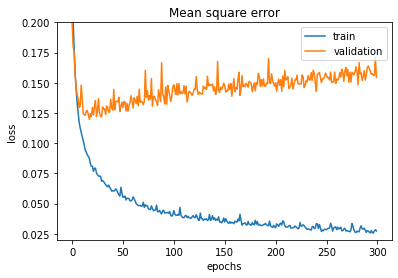

In [16]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.ylim(0.02, 0.2)
plt.title('Mean square error')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

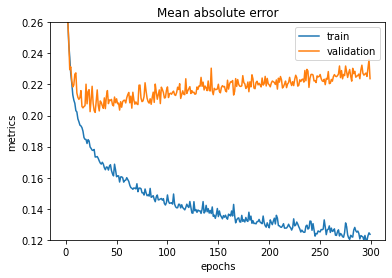

In [17]:
plt.plot(history.history['mean_absolute_error'], label='train')
plt.plot(history.history['val_mean_absolute_error'], label='validation')
plt.ylim(0.12, 0.26)
plt.title('Mean absolute error')
plt.ylabel('metrics')
plt.xlabel('epochs')
plt.legend(loc='upper right')

In [18]:
model = keras.models.load_model('lab2-logs/models/Best-model-1.h5')

y_test = np.array(test_data['price'])

test_data = (test_data - mean) / std

x_test = np.array(test_data.drop('price', axis='columns'))

y_pred = model.predict(x_test)

y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)

percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100

print("Model_1 Percentage Error: {:.2f}%".format(percentage_error))

Model_1 Percentage Error: 13.53%


In [19]:
%load_ext tensorboard
%tensorboard --port 9530 --logdir lab2-logs

In [20]:
model_2 = keras.Sequential(name='model-2')
model_2.add(layers.Dense(16, activation='relu', input_shape=(21,)))
model_2.add(layers.Dense(16, activation='relu'))
model_2.add(layers.Dense(1))

model_2.compile(keras.optimizers.Adam(0.001),
                loss=keras.losses.MeanSquaredError(),
                metrics=[keras.metrics.MeanAbsoluteError()])

log_dir = os.path.join('lab2-logs', 'model-2')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-2.h5', 
                                             monitor='val_mean_absolute_error', 
                                             save_best_only=True, 
                                             mode='min')
model_2.fit(x_train, y_train, 
            batch_size=64 ,
            epochs=300, 
            validation_data=(x_val, y_val), 
            callbacks=[model_cbk, model_mckp])

Epoch 1/300
203/203 [==============================] - 1s 5ms/step - loss: 0.6847 - mean_absolute_error: 0.5457 - val_loss: 0.2834 - val_mean_absolute_error: 0.3481
Epoch 2/300
203/203 [==============================] - 1s 4ms/step - loss: 0.2834 - mean_absolute_error: 0.3386 - val_loss: 0.2346 - val_mean_absolute_error: 0.3123
Epoch 3/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2463 - mean_absolute_error: 0.3131 - val_loss: 0.2163 - val_mean_absolute_error: 0.2981
Epoch 4/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2281 - mean_absolute_error: 0.3000 - val_loss: 0.2092 - val_mean_absolute_error: 0.2942
Epoch 5/300
203/203 [==============================] - 1s 3ms/step - loss: 0.2153 - mean_absolute_error: 0.2904 - val_loss: 0.1995 - val_mean_absolute_error: 0.2845
Epoch 6/300
203/203 [==============================] - 1s 4ms/step - loss: 0.2052 - mean_absolute_error: 0.2841 - val_loss: 0.1940 - val_mean_absolute_error: 0.2795
Epoch 7/30

203/203 [==============================] - 1s 5ms/step - loss: 0.0826 - mean_absolute_error: 0.1852 - val_loss: 0.1236 - val_mean_absolute_error: 0.2006
Epoch 100/300
203/203 [==============================] - 1s 6ms/step - loss: 0.0815 - mean_absolute_error: 0.1838 - val_loss: 0.1194 - val_mean_absolute_error: 0.1979
Epoch 101/300
203/203 [==============================] - 1s 5ms/step - loss: 0.0822 - mean_absolute_error: 0.1845 - val_loss: 0.1246 - val_mean_absolute_error: 0.1975
Epoch 102/300
203/203 [==============================] - 1s 5ms/step - loss: 0.0821 - mean_absolute_error: 0.1846 - val_loss: 0.1200 - val_mean_absolute_error: 0.1978
Epoch 103/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0830 - mean_absolute_error: 0.1852 - val_loss: 0.1175 - val_mean_absolute_error: 0.1976
Epoch 104/300
203/203 [==============================] - 1s 6ms/step - loss: 0.0820 - mean_absolute_error: 0.1848 - val_loss: 0.1278 - val_mean_absolute_error: 0.1997
Epoch 105/30

203/203 [==============================] - 1s 4ms/step - loss: 0.0739 - mean_absolute_error: 0.1774 - val_loss: 0.1307 - val_mean_absolute_error: 0.1970
Epoch 198/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0737 - mean_absolute_error: 0.1770 - val_loss: 0.1243 - val_mean_absolute_error: 0.1976
Epoch 199/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0756 - mean_absolute_error: 0.1781 - val_loss: 0.1210 - val_mean_absolute_error: 0.1945
Epoch 200/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0751 - mean_absolute_error: 0.1782 - val_loss: 0.1201 - val_mean_absolute_error: 0.1949
Epoch 201/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0729 - mean_absolute_error: 0.1763 - val_loss: 0.1288 - val_mean_absolute_error: 0.1986
Epoch 202/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0735 - mean_absolute_error: 0.1765 - val_loss: 0.1213 - val_mean_absolute_error: 0.1951
Epoch 203/30

203/203 [==============================] - 1s 3ms/step - loss: 0.0703 - mean_absolute_error: 0.1737 - val_loss: 0.1211 - val_mean_absolute_error: 0.1982
Epoch 296/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0697 - mean_absolute_error: 0.1737 - val_loss: 0.1189 - val_mean_absolute_error: 0.1952
Epoch 297/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0702 - mean_absolute_error: 0.1733 - val_loss: 0.1248 - val_mean_absolute_error: 0.1956
Epoch 298/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0693 - mean_absolute_error: 0.1734 - val_loss: 0.1235 - val_mean_absolute_error: 0.1970
Epoch 299/300
203/203 [==============================] - 1s 4ms/step - loss: 0.0701 - mean_absolute_error: 0.1742 - val_loss: 0.1175 - val_mean_absolute_error: 0.1940
Epoch 300/300
203/203 [==============================] - 1s 3ms/step - loss: 0.0692 - mean_absolute_error: 0.1734 - val_loss: 0.1168 - val_mean_absolute_error: 0.1958


In [21]:
model_3 = keras.Sequential(name='model-3')
model_3.add(layers.Dense(64, 
                         kernel_regularizer=keras.regularizers.l2(0.001), 
                         activation='relu', input_shape=(21,)))
model_3.add(layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model_3.add(layers.Dense(1))

model_3.compile(keras.optimizers.Adam(0.001),
                loss=keras.losses.MeanSquaredError(),
                metrics=[keras.metrics.MeanAbsoluteError()])

log_dir = os.path.join('lab2-logs', 'model-3')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-3.h5', 
                                             monitor='val_mean_absolute_error', 
                                             save_best_only=True, 
                                             mode='min')
model_3.fit(x_train, y_train, 
            batch_size=64 ,
            epochs=300, 
            validation_data=(x_val, y_val), 
            callbacks=[model_cbk, model_mckp])

Epoch 1/300
203/203 [==============================] - 2s 5ms/step - loss: 0.4232 - mean_absolute_error: 0.3536 - val_loss: 0.2918 - val_mean_absolute_error: 0.2901
Epoch 2/300
203/203 [==============================] - 1s 4ms/step - loss: 0.2909 - mean_absolute_error: 0.2841 - val_loss: 0.2551 - val_mean_absolute_error: 0.2682
Epoch 3/300
203/203 [==============================] - 1s 4ms/step - loss: 0.2533 - mean_absolute_error: 0.2656 - val_loss: 0.2315 - val_mean_absolute_error: 0.2526
Epoch 4/300
203/203 [==============================] - 1s 4ms/step - loss: 0.2310 - mean_absolute_error: 0.2511 - val_loss: 0.2258 - val_mean_absolute_error: 0.2444
Epoch 5/300
203/203 [==============================] - 1s 4ms/step - loss: 0.2101 - mean_absolute_error: 0.2366 - val_loss: 0.2317 - val_mean_absolute_error: 0.2551
Epoch 6/300
203/203 [==============================] - 1s 4ms/step - loss: 0.2028 - mean_absolute_error: 0.2338 - val_loss: 0.2012 - val_mean_absolute_error: 0.2333
Epoch 7/30

KeyboardInterrupt: 

In [ ]:
model_4 = keras.Sequential(name='model-4')
model_4.add(layers.Dense(64, activation='relu', input_shape=(21,)))
model_4.add(layers.Dropout(0.3))
model_4.add(layers.Dense(64, activation='relu'))
model_4.add(layers.Dropout(0.3))
model_4.add(layers.Dense(1))

model_4.compile(keras.optimizers.Adam(0.001),
                loss=keras.losses.MeanSquaredError(),
                metrics=[keras.metrics.MeanAbsoluteError()])

log_dir = os.path.join('lab2-logs', 'model-4')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
model_mckp = keras.callbacks.ModelCheckpoint(model_dir + '/Best-model-4.h5', 
                                             monitor='val_mean_absolute_error', 
                                             save_best_only=True, 
                                             mode='min')
model_4.fit(x_train, y_train, 
            batch_size=64 ,
            epochs=300, 
            validation_data=(x_val, y_val), 
            callbacks=[model_cbk, model_mckp])

In [ ]:
model_2 = keras.models.load_model('lab2-logs/models/Best-model-2.h5')
y_pred = model_2.predict(x_test)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
print("Model_2: {:.2f}%".format(percentage_error))

In [ ]:
model_3 = keras.models.load_model('lab2-logs/models/Best-model-3.h5')
y_pred = model_3.predict(x_test)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
print("Model_3: {:.2f}%".format(percentage_error))

In [ ]:
model_4 = keras.models.load_model('lab2-logs/models/Best-model-4.h5')
y_pred = model_4.predict(x_test)
y_pred = np.reshape(y_pred * std['price'] + mean['price'], y_test.shape)
percentage_error = np.mean(np.abs(y_test - y_pred)) / np.mean(y_test) * 100
print("Model_4: {:.2f}%".format(percentage_error))

In [1]:
%load_ext tensorboard
%tensorboard --port 9530 --logdir lab2-logs